In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import random
import time

In [2]:
products_labeled= pd.read_csv("/home/davidgozalo/Ironhack/ih_datamadpt0420_final_project/data/processed/products_labeled.csv")
people_labeled=pd.read_csv("/home/davidgozalo/Ironhack/ih_datamadpt0420_final_project/data/processed/people_labeled.csv")

/home/davidgozalo/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (21,23,24,120,122,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Bienvenido al programa de selección de fondos de inversión

Elige entre estas tres opciones:

1: Asignación de carteras tipo a segmentos de personas
2: Selección de una cartera optimizada para una persona
3: Cuestionario y recomendación de fondos
4: Salir del programa



¿Qué quieres hacer? 2



Estupendo.
Elegiremos un cliente al azar y veremos la asingación de activos recomendada.

El cliente seleccionado es el múmero:14256
Es una mujer
Está casada
Tiene entre 35 y 44 años
Vive en dsistrito censal de East-South Central 
 (Alabama, Kentucky, Mississippi, Tennessee)

La estimación de su patrimonio para invertir es de 18500
Su nivel de aceptación de riesgo es moderado
Su horizonte de inversión es medio
Su conocimiento financiero es básico
Segmento:231
('perfil de riesgo:medio', 'horizonte temporal:medio plazo', 'conocimientos financieros:básico')
Propuesta de inversión:
   1:El 30% de la inversión, es decir, 5550, irá al fondo Federated High Yield Trust Institutional Shares, (bonds-medium-rating2)
   2:El 23% de la inversión, es decir, 4316, irá al fondo Berkshire Focus Fund, (stocks-beta2)
   3:El 23% de la inversión, es decir, 4316, irá al fondo ALPS/Red Rocks Listed Private Equity Fund Class I, (stocks-beta2)
   4:El 23% de la inversión, es decir, 4316, irá al fondo Rydex L

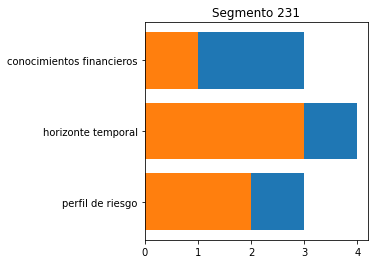

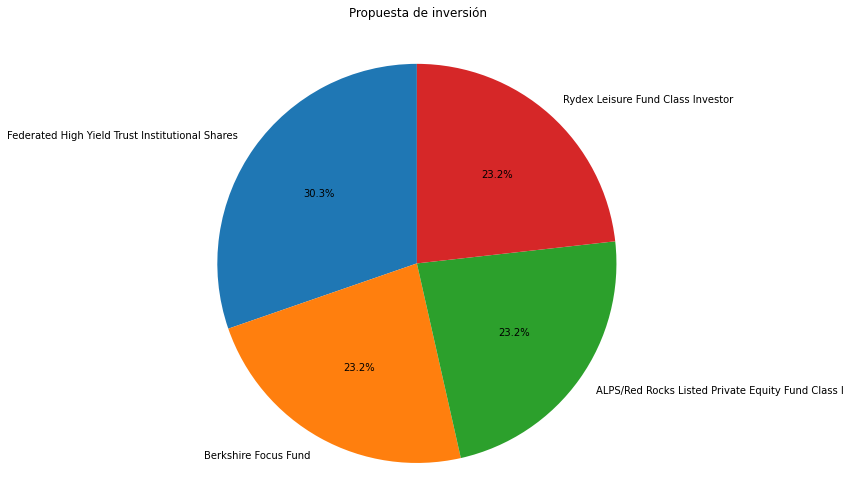


Gracias por usar el programa


In [523]:
# 1. We create a dictionary for every portfolio, with the proportions of each attribute
portfolio111={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }

portfolio112={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }
   
    
portfolio113={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }

portfolio211={
    "bonds-liquidity-rating1":0.1,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.9,
    "convertable":0,
    "preferred":0,
                  }
    
portfolio212={
    "bonds-liquidity-rating1":0.2,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.8,
    "convertable":0,
    "preferred":0,
                  }

portfolio213={
    "bonds-liquidity-rating1":0.3,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.7,
    "convertable":0,
    "preferred":0,
                  }

portfolio311={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.7,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.3,
    "convertable":0,
    "preferred":0,
                  }

portfolio312={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.8,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.2,
    "convertable":0,
    "preferred":0,
                  }
portfolio313={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.9,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.1,
    "convertable":0,
    "preferred":0,
                  }

portfolio121={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.1,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.9,
    "convertable":0,
    "preferred":0,
                  }

portfolio122={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.2,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.8,
    "convertable":0,
    "preferred":0,
                  }

portfolio123={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.3,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.7,
    "convertable":0,
    "preferred":0,
                  }

portfolio221={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.7,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.3,
    "convertable":0,
    "preferred":0,
                  }

portfolio222={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.8,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.2,
    "convertable":0,
    "preferred":0,
                  }

portfolio223={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.9,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.1,
    "convertable":0,
    "preferred":0,
                  }


portfolio321={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":1,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio322={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio323={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio131={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.9,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.1,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio132={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.8,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.2,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio133={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.7,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.3,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio231={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0.3,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.7,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio232={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0.2,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.8,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio233={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0.1,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.9,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio331={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio332={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio333={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }


portfolio141={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.3,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.7,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio142={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.2,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.8,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio143={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.9,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio241={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio242={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio243={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio341={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio342={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio343={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                     }

# 2. We keep the characteristics of every segment

lista=[('111', ' low risk ', ' liquidity ', ' basic knowldege '),
 ('112', ' low risk ', ' liquidity ', ' medium knowldege '),
 ('113', ' low risk ', ' liquidity ', ' high knowledge '),
 ('121', ' low risk ', ' short term ', ' basic knowldege '),
 ('122', ' low risk ', ' short term ', ' medium knowldege '),
 ('123', ' low risk ', ' short term ', ' high knowledge '),
 ('131', ' low risk ', ' medium term ', ' basic knowldege '),
 ('132', ' low risk ', ' medium term ', ' medium knowldege '),
 ('133', ' low risk ', ' medium term ', ' high knowledge '),
 ('141', ' low risk ', ' long term ', ' basic knowldege '),
 ('142', ' low risk ', ' long term ', ' medium knowldege '),
 ('143', ' low risk ', ' long term ', ' high knowledge '),
 ('211', ' medim risk ', ' liquidity ', ' basic knowldege '),
 ('212', ' medim risk ', ' liquidity ', ' medium knowldege '),
 ('213', ' medim risk ', ' liquidity ', ' high knowledge '),
 ('221', ' medim risk ', ' short term ', ' basic knowldege '),
 ('222', ' medim risk ', ' short term ', ' medium knowldege '),
 ('223', ' medim risk ', ' short term ', ' high knowledge '),
 ('231', ' medim risk ', ' medium term ', ' basic knowldege '),
 ('232', ' medim risk ', ' medium term ', ' medium knowldege '),
 ('233', ' medim risk ', ' medium term ', ' high knowledge '),
 ('241', ' medim risk ', ' long term ', ' basic knowldege '),
 ('242', ' medim risk ', ' long term ', ' medium knowldege '),
 ('243', ' medim risk ', ' long term ', ' high knowledge '),
 ('311', ' high risk ', ' liquidity ', ' basic knowldege '),
 ('312', ' high risk ', ' liquidity ', ' medium knowldege '),
 ('313', ' high risk ', ' liquidity ', ' high knowledge '),
 ('321', ' high risk ', ' short term ', ' basic knowldege '),
 ('322', ' high risk ', ' short term ', ' medium knowldege '),
 ('323', ' high risk ', ' short term ', ' high knowledge '),
 ('331', ' high risk ', ' medium term ', ' basic knowldege '),
 ('332', ' high risk ', ' medium term ', ' medium knowldege '),
 ('333', ' high risk ', ' medium term ', ' high knowledge '),
 ('341', ' high risk ', ' long term ', ' basic knowldege '),
 ('342', ' high risk ', ' long term ', ' medium knowldege '),
 ('343', ' high risk ', ' long term ', ' high knowledge ')]
dicty=[]
segmentos=[]
for element in lista:
    a=element[0]
    a1=element[1]
    a2=element[2]
    a3=element[3]
    if a1==' high risk ':
        ta1='alto'
    if a1==' medim risk ':
        ta1='medio'
    if a1==' low risk ':
        ta1='bajo'
    if a2==' liquidity ':
        ta2='liquidez'
    if a2==' short term ':
        ta2='corto plazo'
    if a2==' medium term ':
        ta2='medio plazo'
    if a2==' long term ':
        ta2='largo plazo'
    if a3==' basic knowldege ':
        ta3='básico'
    if a3==' medium knowldege ':
        ta3='medio'
    if a3==' high knowledge ':
        ta3='alto'
    pair=(a, (("perfil de riesgo:"+ta1),"horizonte temporal:"+ta2,"conocimientos financieros:"+ta3))
    dicty.append(pair)
    segmentos.append(a)
segment_dictionary=dict(dicty)

# 3. We prepare the processs

# 3.1 identify attributes that have stock
no_stock=["bonds-liquidity-rating1",
    "bonds-liquidity-rating2",
    "bonds-liquidity-rating3",
    "bonds-short-rating1",
    "bonds-short-rating2",
    "bonds-short-rating3",
    "bonds-medium-rating1",
    "bonds-medium-rating2",
    "bonds-medium-rating3",
    "bonds-long-rating1",
    "bonds-long-rating2",
    "bonds-long-rating3",
    "cash"]
    
stock=["stocks-beta1",
    "stocks-beta2",
    "stocks-beta3",  
    "convertable",
    "preferred"]

# 3.2 create the "divider" function
def divider(amount):
    for i in range (5):
        div=5-i
        if amount/div<5000:
            pass
        if amount/div>=5000:
            return div
        
# 4 some texts to be used later on

text_a="Hemos seleccionado un fondo de bonos de liquidez (que invierte mayoritariamente a muy corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_b="Hemos seleccionado un fondo de bonos de liquidez (que invierte mayoritariamente a muy corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_c="Hemos seleccionado un fondo de bonos de liquidez (que invierte mayoritariamente a muy corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_d="Hemos seleccionado un fondo de bonos a corto plazo (que invierte mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_e="Hemos seleccionado un fondo de bonos a corto plazo (que invierte mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_f="Hemos seleccionado un fondo de bonos a corto plazo (que invierte mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_g="Hemos seleccionado un fondo de bonos a medio plazo (que invierte mayoritariamente en bonos a medio plazo: entre cuatro y siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_h="Hemos seleccionado un fondo de bonos a medio plazo (que invierte mayoritariamente en bonos a medio plazo: entre cuatro y siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_i="Hemos seleccionado un fondo de bonos a medio plazo (que invierte mayoritariamente en bonos a medio plazo: entre cuatro y siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierte tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_j="Hemos seleccionado un fondo de bonos a largo plazo (que invierte mayoritariamente en bonos a largo plazo: más de siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tiene una clasificación de solvencia máxima, según tu aversión al riesgo."
text_k="Hemos seleccionado un fondo de bonos a largo plazo (que invierte mayoritariamente en bonos a largo plazo: más de siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tiene una clasificación de solvencia media, según tu aversión al riesgo."
text_l="Hemos seleccionado un fondo de bonos a largo plazo (que invierte mayoritariamente en bonos a largo plazo: más de siete años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tiene una clasificación solvencia baja, según tu aversión al riesgo."
text_m="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es menor que la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_n="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_o="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es mucho mayor que la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_p="Hemos seleccionado un fondo de liquidez (que invierte en dinero y en activos a muy corto plazo), debido a que el horizonte de inversión que nos indicas es muy corto."
text_q="Hemos seleccionado fondos de bonos convertibles para diversificar tu inversión con un activo sofisticado."
text_r="Hemos seleccionado fondos de acciones preferentes para diversificar tu inversión con un activo sofisticado" 

text_s="Hemos seleccionado un fondo de acciones (que invierte mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es menor que la del índice de su industria."
text_t="Hemos seleccionado un fondo de acciones (que invierte mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que la del índice de su industria."
text_u="Hemos seleccionado un fondo de acciones (que invierte mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es mucho mayor que la del índice de su industria."



portfolio_text={
    "bonds-liquidity-rating1":text_a,
    "bonds-liquidity-rating2":text_b,
    "bonds-liquidity-rating3":text_c,
    "bonds-short-rating1":text_d,
    "bonds-short-rating2":text_e,
    "bonds-short-rating3":text_f,
    "bonds-medium-rating1":text_g,
    "bonds-medium-rating2":text_h,
    "bonds-medium-rating3":text_i,
    "bonds-long-rating1":text_j,
    "bonds-long-rating2":text_k,
    "bonds-long-rating3":text_l, 
    "stocks-beta1":text_m,
    "stocks-beta2":text_n,
    "stocks-beta3":text_o,  
    "cash":text_p,
    "convertable":text_q,
    "preferred":text_r
}

portfolio_text_stocks={ 
    "stocks-beta1":text_s,
    "stocks-beta2":text_t,
    "stocks-beta3":text_u,  
}


# We collect some quotes:
q1="De aquel que opina que el dinero puede hacerlo todo, cabe sospechar con fundamento que será capaz de hacer cualquier cosa por dinero.\n(Benjamin Franklin)"
q2="¿Quieres ser rico? Pues no te afanes en aumentar tus bienes, sino en disminuir tu codicia.\n(Epicuro de Samos)"
q2="No estimes el dinero en más ni en menos de lo que vale, porque es un buen siervo y un mal amo.\n(Alejandro Dumas)" 
q3="No confíe usted en aquellos que han encontrado ya la verdad, confíe solamente en quienes siguen buscándola\n(André Kostolany)"
q4="El dinero no da la felicidad, ciertamente; pero tampoco es un serio obstáculo.\n(Josep Pla)" 
q5="¡Hay tantas cosas en la vida más importantes que el dinero! ¡Pero cuestan tanto!\nGroucho Marx)"
q6="El dinero no da la felicidad, pero procura una sensación tan parecida, que necesita un especialista muy avanzado para verificar la diferencia.\n(Woody Allen)"
q7="El camino hacía la riqueza depende fundamentalmente de dos palabras: trabajo y ahorro.(Benjamin Franklin)" 
q8="Dos linajes solos hay en el mundo, como decía una agüela mía, que son el tener y el no tener.\n(Miguel de Cervantes)" 
q9="El que está satisfecho con su parte es rico.\n(Lao-tsé)" 
q10="Muchos hablan sinceramente cuando dicen que desprecian las riquezas, pero se refieren a las riquezas que poseen los demás.\n(Charles Caleb Colton)" 
q11="El que tiene lo bastante para poder hacer bien a otros, es rico.\n(Thomas Browne)"
q12="El mercado puede permanecer irracional más tiempo del que usted puede permanecer solvente.\n(John Maynard Keynes)"
q13="Un banco es un lugar que te presta dinero si puedes probar que no lo necesitas.\n(Bob Hope)"
q14="El precio es lo que pagas. El valor es lo que recibes. \n(Warren Buffett)"
q15="Los elementos del buen trading son: Primero, cortar las pérdidas, segundo, cortar las pérdidas, y tercero, cortar las pérdidas. Si puede seguir estas tres reglas, entonces tendrás una oportunidad. \n(Ed Sekyota)"
q16="Toda frase breve acerca de la economía es intrínsecamente falsa. \n(Alfred Marshall)"
q17="Definición de economista: es un experto que mañana sabrá explicar por qué las cosas que predijo ayer no han sucedido hoy.\n(Lawrence J. Peter)"
q18="En los negocios prácticos de la vida, no es la fe la que salva, sino la desconfianza.\n(Napoleón Bonaparte)"
q19="Cuida de los pequeños gastos; un pequeño agujero hunde un barco. En este mundo, ninguna cosa es cierta salvo la muerte y los impuestos.\n(Benjamin Franklin)"
q20="Mientras puedes, ahorra para la vejez y la necesidad, porque el sol de la mañana no dura todo el día. Quien compra lo superfluo no tardará en verse obligado a vender lo necesario. Si sabes gastar menos de lo que ganas, has encontrado la piedra filosofal. Un saco vacío se mantiene muy difícilmente en pie.\n(Benjamin Franklin)"
q21="En la vida hay que escoger entre ganar dinero o gastarlo. No hay tiempo suficiente para ambas cosas. \n(Edouard Bourdet)"
q22="Gasta siempre una moneda menos de lo que ganas.\n(Cesare Cantú)"
q23="El hombre que sabe gastar y ahorrar es el más feliz, porque disfruta de ambas cosas.\n(Samuel Johnson)"
q24="¿No es extraño? Los mismos que se ríen de los adivinos se toman en serio a los economistas. \n(Anónimo)"
q25="La Economía es una disciplina narrativa y las explicaciones son fáciles de proporcionar a posteriori.\n(Nassim Taleb)"
q26="Si yo te debo una libra, tengo un problema; pero si te debo un millón, el problema es tuyo.\n(John Maynard Keynes)"
q27="La Bolsa es un juego que consiste en ir pasando de unos a otros una cerilla encendida, hasta que llega a uno que se quema los dedos.\n(John Kennedy)"
q28="Te contaré el secreto para hacerte rico en Wall Street. Sé codicioso cuando otros sean miedosos y sé temeroso cuando otros sean codiciosos.\n(Warren Buffett)"
q29="Una inversión en conocimiento paga el mejor interés. \n(Benjamin Franklin)"
q30="No pienses que el dinero lo hace todo o acabarás haciéndolo todo por el dinero.\n(Voltaire)"
q31="Mientras que el dinero no puede comprar felicidad, te permite elegir tu propia forma de desgracia. \n(Groucho Marx)"
q32="No todo lo que se puede contar cuenta y no todo lo que cuenta se puede contar.\n(Albert Einstein)"
q33="Mis cosas favoritas de la vida no cuestan dinero. Está claro que el recurso más preciado que tenemos es el tiempo.\n(Steve Jobs)"
q34="La razón más tonta del mundo para comprar una acción es porque está subiendo.\n(Warren Buffett)"
q35="Cada vez que pides prestado dinero, estas robando dinero a tu futuro.\n(Nathan W. Morris)"
q36="Está bien tener dinero y las cosas que el dinero puede comprar, pero está bien también comprobar de vez en cuando que no has perdido las cosas que el dinero no puede comprar. \n(George Lorimer)"
q37="El arte no está en ganar dinero, sino en mantenerlo.\n(Anónimo)"
q38="Cuando era joven, pensaba que el dinero era lo más importante en la vida. Ahora que soy mayor, sé que lo es.\n(Oscar Wilde)"
q39="En la inversión, lo que es cómodo es raramente rentable.\n(Robert Arnott)"
q40="El hábito del ahorro es una educación; fomenta cada virtud, enseña autocontrol, cultiva el sentido del orden, entrena la previsión y amplía la mente.\n(T.T. Munger)"

quotes=[q1,q2,q3,q4,q5, q6,q7,q9,q10, q11, q12, q13, q14, q15, q16, q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40]
        
# 4. User's choice:

print("Bienvenido al programa de selección de fondos de inversión")
print()
print("Elige entre estas tres opciones:")
print()
print("1: Asignación de carteras tipo a segmentos de personas")
print("2: Selección de una cartera optimizada para una persona")
print("3: Cuestionario y recomendación de fondos")
print("4: Salir del programa")
print()
option=0

option=input("¿Qué quieres hacer?")
for i in range (500):
    # Process1
    if option=="1":
        print()
        time.sleep(1)
        print("Genial.\nVamos a hacer una asignación de activos para cada segmento de personas en la base de datos.")
        print()
        for element in segmentos:
            segment=element
            amount=100000
            if segment=="111": portfolio=portfolio111
            if segment=="112": portfolio=portfolio112
            if segment=="113": portfolio=portfolio113
            if segment=="121": portfolio=portfolio121
            if segment=="122": portfolio=portfolio122
            if segment=="123": portfolio=portfolio123
            if segment=="131": portfolio=portfolio131
            if segment=="132": portfolio=portfolio132
            if segment=="133": portfolio=portfolio133
            if segment=="141": portfolio=portfolio141
            if segment=="142": portfolio=portfolio142
            if segment=="143": portfolio=portfolio143
            if segment=="211": portfolio=portfolio211
            if segment=="212": portfolio=portfolio212
            if segment=="213": portfolio=portfolio213
            if segment=="221": portfolio=portfolio221
            if segment=="222": portfolio=portfolio222
            if segment=="223": portfolio=portfolio223
            if segment=="231": portfolio=portfolio231
            if segment=="232": portfolio=portfolio232
            if segment=="233": portfolio=portfolio233
            if segment=="241": portfolio=portfolio241
            if segment=="242": portfolio=portfolio242
            if segment=="243": portfolio=portfolio243
            if segment=="311": portfolio=portfolio311
            if segment=="312": portfolio=portfolio312
            if segment=="313": portfolio=portfolio313
            if segment=="321": portfolio=portfolio321
            if segment=="322": portfolio=portfolio322
            if segment=="323": portfolio=portfolio323
            if segment=="331": portfolio=portfolio331
            if segment=="332": portfolio=portfolio332
            if segment=="333": portfolio=portfolio333
            if segment=="341": portfolio=portfolio341
            if segment=="342": portfolio=portfolio342
            if segment=="343": portfolio=portfolio343
            selection=[]
            industries=[]
            funds=[]
            count_stock=0
            for key in portfolio: # we iterate the portfolio
                if portfolio[key]!=0: # for every weight different than zero....
                    if key in no_stock: # if it is not a stock, we take the whole weight
                        products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"] # we select the subset of funds from this attribute
                        products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                        fund=products_sel_rank.iloc[0]["fund_name"] # we choose the first fund on the list (fund_name)
                        fund_extended_name=products_sel_rank.iloc[0]["fund_extended_name"] # we choose the first fund on the list (fund_extended_name")
                
                        selection.append((key,"not industry specific",fund_extended_name,"{:.0%}".format(portfolio[key]),int(amount*portfolio[key]))) # we keep the fund name, the attibute, the weight and the amount
                
                    if key in stock: #if it is a stock (or similar) we distribute the weight diversifying by industry
                        products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"]# we select the subset of funds from this attribute
                        products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                        n=divider(amount) # we get the number of parts in which the amount will be diversifyed
                        top=products_sel_rank.shape[0]
                        for nf in range (n): #for every part we will choose a stock fund
                            for r in range (top):
                                fund=products_sel_rank.iloc[r]["fund_name"]
                                fund_extended_name=products_sel_rank.iloc[r]["fund_extended_name"]
                                industry=products_sel_rank.iloc[r]["portfolio_industry"]
                                if (industry not in industries) and (fund not in funds) and (industry!="0"): # we make sure that we have not chosen this fund or industry before
                                    funds.append(fund) #for control
                                    industries.append(industry) # for control
                            
                                    selection.append((key,industry,fund_extended_name,"{:.0%}".format(portfolio[key]/n),int(amount*portfolio[key]/n))) # we keep the fund name, the attibute, the weight and the amount

                                    count_stock=count_stock+1 # we count how many stock funds we have chosen
                                if count_stock==n: # once we get to the limit we break
                                    break
                                else: # if the fund that we have focused does not meet the criteria we jump for the next in the ranking
                                    r=r+1
                else: pass
    
            print ("Segmento:"+segment)
            print(segment_dictionary[segment])
            d=0
            print("Propuesta de inversión:")
            for element in selection:
                d=d+1
                print (f"   {d}:El {element[3]} de la inversión irá al fondo {element[2]}, ({element[0]})")
            print()
            print()
            
             

        print("Para cada segmento podemos dibujar un gráfico que resume su perfil de riesgo, horizonte temporal y conocimientos financieros.")
        time.sleep(1)
        graf=people_labeled["label"].value_counts().sort_index().reset_index() 
        graf.rename(columns={"index": "label", "label":"count"}, inplace=True)
        categories=["perfil de riesgo", "horizonte temporal", "conocimientos financieros"]
        n=0
        seleccion=random.sample(segmentos,4)
        for seg in segmentos:
            if seg in seleccion:
                values=[]
                for i in range(len(seg)):
                    val=int(seg[i])
                    values.append(val)
                a=graf.iloc[int(n)]['count']
                n=n+1
                fig=plt.figure(figsize=(4,4))
                ax=plt.barh(categories, [3,4,3])
                ax=plt.barh(categories,values)
                plt.title(f'segmento {seg}:   nº de personas:{a}')
                plt.show()
            else:pass
            
   
        
        select_graf_list=[]
        for element in segmentos:
            segment=element
            amount=100000
            if segment=="111": portfolio=portfolio111
            if segment=="112": portfolio=portfolio112
            if segment=="113": portfolio=portfolio113
            if segment=="121": portfolio=portfolio121
            if segment=="122": portfolio=portfolio122
            if segment=="123": portfolio=portfolio123
            if segment=="131": portfolio=portfolio131
            if segment=="132": portfolio=portfolio132
            if segment=="133": portfolio=portfolio133
            if segment=="141": portfolio=portfolio141
            if segment=="142": portfolio=portfolio142
            if segment=="143": portfolio=portfolio143
            if segment=="211": portfolio=portfolio211
            if segment=="212": portfolio=portfolio212
            if segment=="213": portfolio=portfolio213
            if segment=="221": portfolio=portfolio221
            if segment=="222": portfolio=portfolio222
            if segment=="223": portfolio=portfolio223
            if segment=="231": portfolio=portfolio231
            if segment=="232": portfolio=portfolio232
            if segment=="233": portfolio=portfolio233
            if segment=="241": portfolio=portfolio241
            if segment=="242": portfolio=portfolio242
            if segment=="243": portfolio=portfolio243
            if segment=="311": portfolio=portfolio311
            if segment=="312": portfolio=portfolio312
            if segment=="313": portfolio=portfolio313
            if segment=="321": portfolio=portfolio321
            if segment=="322": portfolio=portfolio322
            if segment=="323": portfolio=portfolio323
            if segment=="331": portfolio=portfolio331
            if segment=="332": portfolio=portfolio332
            if segment=="333": portfolio=portfolio333
            if segment=="341": portfolio=portfolio341
            if segment=="342": portfolio=portfolio342
            if segment=="343": portfolio=portfolio343
            selection=[]
            industries=[]
            funds=[]
            count_stock=0
            select_graf=[]
            for key in portfolio: # we iterate the portfolio
                if portfolio[key]!=0: # for every weight different than zero....
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"] # we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    fund=products_sel_rank.iloc[0]["fund_name"] # we choose the first fund on the list (fund_name)
                    fund_extended_name=products_sel_rank.iloc[0]["fund_extended_name"] # we choose the first fund on the list (fund_extended_name")
                
                    selection.append((key,"not industry specific",fund_extended_name,"{:.0%}".format(portfolio[key]),int(amount*portfolio[key]))) # we keep the fund name, the attibute, the weight and the amount
                    select_graf.append((segment,key,"{:.0%}".format(portfolio[key])))
                else:
                    pass
            select_graf_list.append(select_graf)
      
        seleccion2=[]
        a=0
        for i in segmentos:
            a=a+1
            if i in seleccion:
                seleccion2.append(a-1)
            else:
                pass
        for e in range(36):
            if e in seleccion2:
                labels_list=[]
                sizes_list=[]
                for l in range(len(select_graf_list[e])):
                    k1=re.sub("%","",(select_graf_list[e][l][2]))
                    k=int(k1)
                    labels_list.append(select_graf_list[e][l][1])
                    sizes_list.append(k)
                labels=tuple(labels_list)
                sizes=tuple(sizes_list)
                fig1, ax1 = plt.subplots()
                ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
                ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                ax1.set_title(f"{select_graf_list[e]}")

                plt.show()
            else:pass

        
        
        
        def two_first(var):
            az=str(var)
            bz=az[:2]
            return bz
        people_labeled["simple_label"]=people_labeled["label"].apply(two_first)
        seg_dist=people_labeled["simple_label"].value_counts().sort_index()
        values=[]
        for t in range (len(seg_dist)):
            values.append(seg_dist[t])
        array_values=np.array(values)
        array_fin=array_values.reshape(3,4)

        y_axis = ["riesgo bajo", "riesgo medio", "riesgo alto"]
        x_axis = ["liquidez", "corto plazo", "medio plazo","largo plazo"]

        data = array_fin
        print("Y este es un resumen con el número de personas para cada combinación de perfil de riesgo y horizonte temporal")
        fig, ax = plt.subplots()
        im = ax.imshow(data)

        # We want to show all ticks...
        ax.set_xticks(np.arange(len(x_axis)))
        ax.set_yticks(np.arange(len(y_axis)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(x_axis)
        ax.set_yticklabels(y_axis)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(y_axis)):
            for j in range(len(x_axis)):
                text = ax.text(j, i, data[i, j],ha="center", va="center", color="w")       

        ax.set_title("Riesgo y horizonte temporal")
        fig.tight_layout()
        plt.show()
        
        break
        
    if option=="2":
        print()
        time.sleep(1)
        print("Estupendo.\nElegiremos un cliente al azar y veremos la asingación de activos recomendada.")
        print()
        # We select randomly a customer
        people_sel=people_labeled[["label","PUF_ID","potential_investment"]].sample(n=1) 
        cte_id=people_sel["PUF_ID"].iloc[0]
        # We select the segment and ammount of the selected person
        segment=str(people_sel.iloc[0]['label'])
        amount=int(people_sel.iloc[0]['potential_investment'])
        # We show the basic data of the person
        patr=people_sel["potential_investment"].iloc[0]
        people_detail=people_labeled[people_labeled["PUF_ID"]==cte_id]
        rango_edad=people_detail.iloc[0]['agecat']
        genero=people_detail.iloc[0]['PPGENDER']
        distrito_censal=people_detail.iloc[0]['PPREG9']
        estado_civil=people_detail.iloc[0]['PPMARIT']
        people_detail.iloc[0]['PUF_ID']
        nivel_de_riesgo=segment[0]
        plazo=segment[1]
        conocimiento_financiero=segment[2]
        d_conocimiento_financiero ={ "1": "básico", "2": "intermedio", "3": "alto"}
        d_nivel_de_riesgo={ "1": "bajo", "2": "moderado", "3": "alto"}
        d_plazo={ "1": "la liquidez", "2": "corto", "3": "medio", "4": "largo" }
        d_agecat={
          1: "entre 18 y 24 años",
          2: "entre 25 y 34 años",
          3: "entre 35 y 44 años",
          4: "entre 45 y 54 años",
          5: "entre 55 y 61 años",
          6: "entre 62 y 69 años",
          7: "entre 70 y 74 años",
          8: "más de 74 años"}
        d_distrito_censal={
          1: "New England \n (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont)",
          2: "Mid-Atlantic \n (New Jersey, New York, Pennsylvania)",
          3: "East-North Central \n (Illinois, Indiana, Michigan, Ohio, Wisconsin)",
          4: "West-North Central \n (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, South Dakota)",
          5: "South Atlantic \n (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, Washington D.C., West Virginia)",
          6: "East-South Central \n (Alabama, Kentucky, Mississippi, Tennessee)",
          7: "West-South Central \n (Arkansas, Louisiana, Oklahoma, Texas)",
          8: "Mountain \n (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, Wyoming)",
          9: "Pacific \n (Alaska, California, Hawaii, Oregon, Washington)"}
        d_genero={
          1: " hombre",
          2: "a mujer"}
        d_estado_civil_m={
          1: "Está casado",
          2: "Es viudo",
          3: "Está separado",
          4: "Es soltero",
          5: "Vive con su pareja"}
        d_estado_civil_f={
          1: "Está casada",
          2: "Es viuda",
          3: "Está separada",
          4: "Es soltera",
          5: "Vive con su pareja"}
        print(f"El cliente seleccionado es el múmero:{cte_id}")
        print (f"Es un{d_genero[genero]}")
        if genero==1:print(d_estado_civil_m[estado_civil])
        if genero==2:print(d_estado_civil_f[estado_civil])
        print (f"Tiene {d_agecat[rango_edad]}")
        print (f"Vive en dsistrito censal de {d_distrito_censal[distrito_censal]}")
        print()
        print(f"La estimación de su patrimonio para invertir es de {patr}")
        print(f"Su nivel de aceptación de riesgo es {d_nivel_de_riesgo[nivel_de_riesgo]}")
        print (f"Su horizonte de inversión es {d_plazo[plazo]}")
        print (f"Su conocimiento financiero es {d_conocimiento_financiero[conocimiento_financiero]}")
        

        # For every segment, we assign a portfolio
        if segment=="111": portfolio=portfolio111
        if segment=="112": portfolio=portfolio112
        if segment=="113": portfolio=portfolio113
        if segment=="121": portfolio=portfolio121
        if segment=="122": portfolio=portfolio122
        if segment=="123": portfolio=portfolio123
        if segment=="131": portfolio=portfolio131
        if segment=="132": portfolio=portfolio132
        if segment=="133": portfolio=portfolio133
        if segment=="141": portfolio=portfolio141
        if segment=="142": portfolio=portfolio142
        if segment=="143": portfolio=portfolio143
        if segment=="211": portfolio=portfolio211
        if segment=="212": portfolio=portfolio212
        if segment=="213": portfolio=portfolio213
        if segment=="221": portfolio=portfolio221
        if segment=="222": portfolio=portfolio222
        if segment=="223": portfolio=portfolio223
        if segment=="231": portfolio=portfolio231
        if segment=="232": portfolio=portfolio232
        if segment=="233": portfolio=portfolio233
        if segment=="241": portfolio=portfolio241
        if segment=="242": portfolio=portfolio242
        if segment=="243": portfolio=portfolio243
        if segment=="311": portfolio=portfolio311
        if segment=="312": portfolio=portfolio312
        if segment=="313": portfolio=portfolio313
        if segment=="321": portfolio=portfolio321
        if segment=="322": portfolio=portfolio322
        if segment=="323": portfolio=portfolio323
        if segment=="331": portfolio=portfolio331
        if segment=="332": portfolio=portfolio332
        if segment=="333": portfolio=portfolio333
        if segment=="341": portfolio=portfolio341
        if segment=="342": portfolio=portfolio342
        if segment=="343": portfolio=portfolio343

        # given the segment and ammount we select the fund and proportion based on the portfolio data

        selection=[]
        industries=[]
        funds=[]
        count_stock=0
        for key in portfolio: # we iterate the portfolio
            if portfolio[key]!=0: # for every weight different than zero....
                if key in no_stock: # if it is not a stock, we take the whole weight
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"] # we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    fund=products_sel_rank.iloc[0]["fund_name"] # we choose the first fund on the list (fund_name)
                    fund_extended_name=products_sel_rank.iloc[0]["fund_extended_name"] # we choose the first fund on the list (fund_extended_name")
                
                    selection.append((key,"not industry specific",fund_extended_name,"{:.0%}".format(portfolio[key]),int(amount*portfolio[key]))) # we keep the fund name, the attibute, the weight and the amount
                
                if key in stock: #if it is a stock (or similar) we distribute the weight diversifying by industry
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"]# we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    n=divider(amount) # we get the number of parts in which the amount will be diversifyed
                    top=products_sel_rank.shape[0]
                    for nf in range (n): #for every part we will choose a stock fund
                        for r in range (top):
                            fund=products_sel_rank.iloc[r]["fund_name"]
                            fund_extended_name=products_sel_rank.iloc[r]["fund_extended_name"]
                            industry=products_sel_rank.iloc[r]["portfolio_industry"]
                            if (industry not in industries) and (fund not in funds) and (industry!="0"): # we make sure that we have not chosen this fund or industry before
                                funds.append(fund) #for control
                                industries.append(industry) # for control
                            
                                selection.append((key,industry,fund_extended_name,"{:.0%}".format(portfolio[key]/n),int(amount*portfolio[key]/n))) # we keep the fund name, the attibute, the weight and the amount

                                count_stock=count_stock+1 # we count how many stock funds we have chosen
                            if count_stock==n: # once we get to the limit we break
                                break
                            else: # if the fund that we have focused does not meet the criteria we jump for the next in the ranking
                                r=r+1
            else: pass

    
        print ("Segmento:"+segment)
        print(segment_dictionary[segment])
        d=0
        print("Propuesta de inversión:")
        for element in selection:
            d=d+1
            print (f"   {d}:El {element[3]} de la inversión, es decir, {element[4]}, irá al fondo {element[2]}, ({element[0]})")
        print()


        categories=["perfil de riesgo", "horizonte temporal", "conocimientos financieros"]
        values=[]
        for i in range(len(segment)):
            val=int(segment[i])
            values.append(val)
        fig=plt.figure(figsize=(4,4))
        ax=plt.barh(categories, [3,4,3])
        ax=plt.barh(categories,values)
        plt.title(f'Segmento {segment}') 
        plt.show()
        print()

        labels_list=[]
        sizes_list=[]
        for i in range (len(selection)):
            k=selection[i][3]
            k1=re.sub("%","",(k))
            k2=int(k1)
            sizes_list.append(k2)
            s=selection[i][2]
            labels_list.append(s)
        labels=tuple(labels_list)
        sizes=tuple(sizes_list)

        fig1, ax1 = plt.subplots(figsize=(8,8))
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title("Propuesta de inversión", y=1.06)

        plt.show() 
          
        
        
        
        break
        
    if option=="3":
        #1. Presentation
        print()
        print("Bienvenido al cuestionario sobre situación y preferencias de inversión")
        print("El objetivo del mismo es saber de ti para hacerte una recomendación de compra de fondos de inversión.")
        print("Te preguntaremos sobre tu situación financiera, tu aversión al riesgo, tu plazo de inversión y tus conocimientos financieros.")
        print()

        time.sleep(2)
        # 2. Ask for the name
        nombre=input("Pero antes de empezar, como en esas llamadas de los call centers que nos interrumpen la siesta, dinos, por favor, tu nombre (para dirigirnos a ti.)")
        time.sleep(1)
        print()

        # 2. Use the name
        print(f'Gracias, {nombre}, empezamos pues. ')
        print()

        # 3. Cultura financiera
        print("Lo primero, queremos saber cómo andas de cultura financiera")
        time.sleep(1)
        print()
        print ("Si establecemos tres niveles:\n 1: Básico\n 2: Intermedio\n 3: Alto")
        print()
        for i in range (500):
            conocimiento_financiero=input("¿Dónde te ves? (elige un número)")
            if conocimiento_financiero not in ["1","2","3"]:
                print("Ha de ser un número del 1 al 3")
            if conocimiento_financiero in ["1","2","3"]:
                break
        print()

        # 4. Perfil de riesgo
        print("Perfecto, también queremos que nos digas si eres atrevido con las inversiones o conservador")
        print()
        time.sleep(1)
        print ("Si te propusieramos una inversión en la que puedes perder una parte de lo invertido, con qué posición te identificas más:\n 1: No toleraría perder nada de lo invertido, aunque ganase poco\n 2: Podría perder algo, pero moderadamente, para obtener un rendimiento mayor\n 3: Estoy dispuesto a todo con tal de obtener un rendimiento alto")
        print()
        for i in range (500):
            nivel_de_riesgo=input("¿Con cuál te identificas? (elige un número)")
            if nivel_de_riesgo not in ["1","2","3"]:
                print("Ha de ser un número del 1 al 3")
            if nivel_de_riesgo in ["1","2","3"]:
                break
        print()

        # 5. Plazo
        print("Genial, también necesitamos conocer el plazo en el que te planteas invertir")
        time.sleep(1)
        print()
        print ("Si invirtieras hoy, cuándo te gustaría volver a disponer de tu dinero:\n 1: En menos de un año\n 2: En dos o tres años\n 3: Entre cuatro y siete años\n 4. En ocho o más años ")
        for i in range (500):
            plazo=input("¿En qué periodo te colocas (elige un número)")
            if plazo not in ["1","2","3","4"]:
                print("Ha de ser un número del 1 al 4")
            if plazo in ["1","2","3","4"]:
                break
        print()
        print("Y ya por último, esa frase de rigor cuando se compra un coche o se confiesa un sueldo: ¿de cuánto dinero estamos hablando?")
        time.sleep(1)
        for i in range(500):
            dinero=input("Cuánto dinero vas a plantearte invertir (pon una cantidad en euros)")
            try:
                dinero_cash=int(dinero)
                if isinstance(dinero_cash, int):
                    if dinero_cash<5000:
                        print("La inversión mínima son 5000")
                    if dinero_cash>=5000:break
            except:
                pass

        print()
        d_conocimiento_financiero ={ "1": "básico", "2": "intermedio", "3": "alto"}
        d_nivel_de_riesgo={ "1": "bajo", "2": "moderado", "3": "alto"}
        d_plazo={ "1": "la liquidez", "2": "corto", "3": "medio", "4": "largo" }
        
        segmento=nivel_de_riesgo+plazo+conocimiento_financiero
        
        # We select the segment and ammount of the selected customer
        segment=str(segmento)
        amount=int(dinero_cash)
        

        # For every segment, we assign a portfolio

        if segment=="111": portfolio=portfolio111
        if segment=="112": portfolio=portfolio112
        if segment=="113": portfolio=portfolio113
        if segment=="121": portfolio=portfolio121
        if segment=="122": portfolio=portfolio122
        if segment=="123": portfolio=portfolio123
        if segment=="131": portfolio=portfolio131
        if segment=="132": portfolio=portfolio132
        if segment=="133": portfolio=portfolio133
        if segment=="141": portfolio=portfolio141
        if segment=="142": portfolio=portfolio142
        if segment=="143": portfolio=portfolio143
        if segment=="211": portfolio=portfolio211
        if segment=="212": portfolio=portfolio212
        if segment=="213": portfolio=portfolio213
        if segment=="221": portfolio=portfolio221
        if segment=="222": portfolio=portfolio222
        if segment=="223": portfolio=portfolio223
        if segment=="231": portfolio=portfolio231
        if segment=="232": portfolio=portfolio232
        if segment=="233": portfolio=portfolio233
        if segment=="241": portfolio=portfolio241
        if segment=="242": portfolio=portfolio242
        if segment=="243": portfolio=portfolio243
        if segment=="311": portfolio=portfolio311
        if segment=="312": portfolio=portfolio312
        if segment=="313": portfolio=portfolio313
        if segment=="321": portfolio=portfolio321
        if segment=="322": portfolio=portfolio322
        if segment=="323": portfolio=portfolio323
        if segment=="331": portfolio=portfolio331
        if segment=="332": portfolio=portfolio332
        if segment=="333": portfolio=portfolio333
        if segment=="341": portfolio=portfolio341
        if segment=="342": portfolio=portfolio342
        if segment=="343": portfolio=portfolio343

# given the segment and ammount we select the fund and proportion based on the portfolio data

        selection=[]
        industries=[]
        funds=[]
        count_stock=0
        render=0
        renderstock=0
        for key in portfolio: # we iterate the portfolio
            if portfolio[key]!=0: # for every weight different than zero....
                if key in no_stock: # if it is not a stock, we take the whole weight
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"] # we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    fund=products_sel_rank.iloc[0]["fund_name"] # we choose the first fund on the list (fund_name)
                    fund_extended_name=products_sel_rank.iloc[0]["fund_extended_name"] # we choose the first fund on the list (fund_extended_name")
                
                    selection.append((key,"not industry specific",fund_extended_name,"{:.0%}".format(portfolio[key]),int(amount*portfolio[key]))) # we keep the fund name, the attibute, the weight and the amount
                    render=render+portfolio[key]
                if key in stock: #if it is a stock (or similar) we distribute the weight diversifying by industry
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"]# we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    n=divider(amount) # we get the number of parts in which the amount will be diversifyed
                    top=products_sel_rank.shape[0]
                    for nf in range (n): #for every part we will choose a stock fund
                        for r in range (top):
                            fund=products_sel_rank.iloc[r]["fund_name"]
                            fund_extended_name=products_sel_rank.iloc[r]["fund_extended_name"]
                            industry=products_sel_rank.iloc[r]["portfolio_industry"]
                            if (industry not in industries) and (fund not in funds) and (industry!="0"): # we make sure that we have not chosen this fund or industry before
                                funds.append(fund) #for control
                                industries.append(industry) # for control
                            
                                selection.append((key,industry,fund_extended_name,"{:.0%}".format(portfolio[key]/n),int(amount*portfolio[key]/n))) # we keep the fund name, the attibute, the weight and the amount

                                count_stock=count_stock+1 # we count how many stock funds we have chosen
                                renderstock=renderstock+portfolio[key]
                            if count_stock==n: # once we get to the limit we break
                                break
                            else: # if the fund that we have focused does not meet the criteria we jump for the next in the ranking
                                r=r+1
            else: pass
        
        # 1 Resumen
        print(f'En resumen, {nombre}, nos has dicho\nque tu conocimiento financiero es {d_conocimiento_financiero[conocimiento_financiero]}, \nque tu nivel de aceptación de riesgo es {d_nivel_de_riesgo[nivel_de_riesgo]}, \nque tu horizonte de inversión es {d_plazo[plazo]},\ny que estás pensando en invertir {dinero_cash} euros.')
        
        # 2 propuesta de fondos
        print()

        print ("Según estos datos tu segmento es: "+segment)
        print()
        print(f" - {segment_dictionary[segment][0]}")
        print(f" - {segment_dictionary[segment][1]}")
        print(f" - {segment_dictionary[segment][2]}")
        print()
        d=0
        print("Y esta es la propuesta de inversión para ese segmento:")
        print()
        array_selection=np.array(selection) #we trasnsform list into an array
        sorted_array = array_selection[np.argsort(array_selection[:, 3])] # we sort the array
        sorted_selection=sorted_array.tolist() #we put it back intop a list
        for element in sorted_selection:
            d=d+1
            print (f"   {d}:El {element[3]} de la inversión, es decir, {element[4]}, irá al fondo {element[2]}")
        print()
        
        
        
        
        
        # 3. Explicación de las variables

        stocks=0
        other=0
        industry_list=[]
        for element in selection:
            split_element= re.split("-", element[0])
            if split_element[0]=='stocks':
                stocks=stocks+1
                industry_list.append(element[1])
            else:
                other=other+1
        if stocks==0:
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
        if stocks==1:
            cont=0
            for element in selection:
                print("****")
                split_element= re.split("-", element[0])
                if split_element[0]!='stocks':
                    key=element[0]
                    print(portfolio_text[key])
                if split_element[0]=='stocks':
                    key=element[0]
                    print (portfolio_text_stocks[key])
        if stocks>1:
            cont=0
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
                if split_element[0]=='stocks':cont=cont+1
                if other==0:break
                if cont>1:break

            print ("Los sectores que hemos seleccionado son:\n")
            tindustry_list=[]
            for element in industry_list:
                if element == "energy": 
                    telement="Energía"
                    tindustry_list.append(telement)
                if element == "technology":
                    telement="Tecnología"
                    tindustry_list.append(telement)
                if element == "financial_services": 
                    telement="Servicios financieros"
                    tindustry_list.append(telement)
                if element == "industrials": 
                    telement="Industria"
                    tindustry_list.append(telement)
                if element == "consumer_cyclical": 
                    telement="Consumo cíclico"
                    tindustry_list.append(telement)
                if element == "basic_materials": 
                    telement="Materias primas"
                    tindustry_list.append(telement)
                if element == "utilities": 
                    telement="Suministros"
                    tindustry_list.append(telement)
                if element == "healthcare": 
                    telement="Salud"
                    tindustry_list.append(telement)
                if element == "consumer_defensive": 
                    telement="Consumo básico"
                    tindustry_list.append(telement)
                if element == "communication_services": 
                    telement="Comunicaciones"
                    tindustry_list.append(telement)
            for i in tindustry_list:
                print (i)
        
        # Graphics
        
        categories=["perfil de riesgo", "horizonte temporal", "conocimientos financieros"]
        values=[]
        for i in range(len(segment)):
            val=int(segment[i])
            values.append(val)
        print()
        fig=plt.figure(figsize=(4,4))
        ax=plt.barh(categories, [3,4,3])
        ax=plt.barh(categories,values)
        plt.title(f'Segmento {segment}') 
        plt.show()


        labels_list=[]
        sizes_list=[]
        for i in range (len(selection)):
            k=selection[i][3]
            k1=re.sub("%","",(k))
            k2=int(k1)
            sizes_list.append(k2)
            s=selection[i][2]
            labels_list.append(s)
        labels=tuple(labels_list)
        sizes=tuple(sizes_list)

        fig1, ax1 = plt.subplots(figsize=(8,8))
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title("Propuesta de inversión", y=1.06)
        plt.show()
        

        # We select an item
        print("****")
        print("Y por último, un pensamiento (de nuestros patrocinadores):")
        print()
        print(random.choice(quotes))
        
        break

    if option=="4":
        break
    else:
        print()
        print()
        print("Elige entre estas tres opciones:")
        print()
        print("1: Asignación de carteras tipo a segmentos de personas")
        print("2: Selección de una cartera optimizada para una persona")
        print("3: Cuestionario y recomendación de fondos")
        print("4: Salir del programa")
        option=input("¿Qué quieres hacer?")

print()
print("Gracias por usar el programa")







Según estos datos tu segmento es: 343
('perfil de riesgo:alto', 'horizonte temporal:largo plazo', 'conocimientos financieros:alto')

Y esta sería la propuesta de inversión:
   1:('stocks-beta3', 'technology', 'ProFunds Internet UltraSector Fund Investor Class', '33%', 5000)
   2:('stocks-beta3', 'consumer_cyclical', 'Fidelity Select Automotive Portfolio', '33%', 5000)
   3:('stocks-beta3', 'industrials', 'ProFunds Industrial Ultra Sector Fund Investor Class', '33%', 5000)

****
Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.
Son fondos cuya volatilidad es algo mayor que  la del índice de su industria
Hemos diversificado la inversión escogiendo fondos de varios sectores.
Los sectores que hemos seleccionado son:
Tecnología
Consumo cíclico
Industria


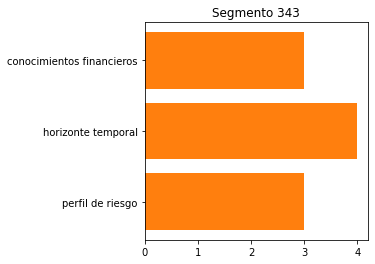

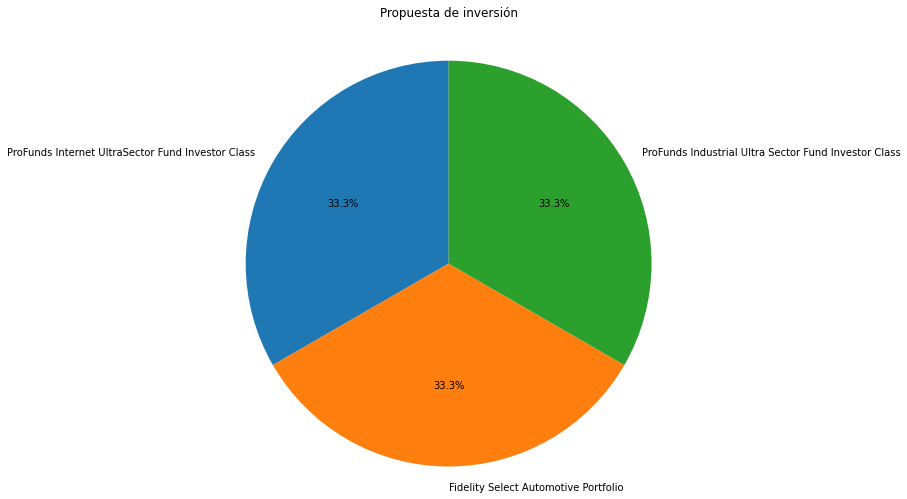

****
Y por último, un pensamiento (de nuestros patrocinadores):

Cada vez que pides prestado dinero, estas robando dinero a tu futuro.
(Nathan W. Morris)


In [439]:


# 1. We create a dictionary for every portfolio, with the proportions of each attribute
portfolio111={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }

portfolio112={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }
   
    
portfolio113={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":1,
    "convertable":0,
    "preferred":0,
                  }

portfolio211={
    "bonds-liquidity-rating1":0.1,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.9,
    "convertable":0,
    "preferred":0,
                  }
    
portfolio212={
    "bonds-liquidity-rating1":0.2,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.8,
    "convertable":0,
    "preferred":0,
                  }

portfolio213={
    "bonds-liquidity-rating1":0.3,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.7,
    "convertable":0,
    "preferred":0,
                  }

portfolio311={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.7,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.3,
    "convertable":0,
    "preferred":0,
                  }

portfolio312={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.8,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.2,
    "convertable":0,
    "preferred":0,
                  }
portfolio313={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0.9,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.1,
    "convertable":0,
    "preferred":0,
                  }

portfolio121={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.1,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.9,
    "convertable":0,
    "preferred":0,
                  }

portfolio122={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.2,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.8,
    "convertable":0,
    "preferred":0,
                  }

portfolio123={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.3,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.7,
    "convertable":0,
    "preferred":0,
                  }

portfolio221={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.7,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.3,
    "convertable":0,
    "preferred":0,
                  }

portfolio222={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.8,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.2,
    "convertable":0,
    "preferred":0,
                  }

portfolio223={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.9,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0.1,
    "convertable":0,
    "preferred":0,
                  }


portfolio321={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":1,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio322={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio323={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio131={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.9,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.1,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio132={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.8,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.2,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio133={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0.7,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.3,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio231={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0.3,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.7,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio232={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.2,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.8,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio233={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0.1,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0.9,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio331={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio332={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio333={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }


portfolio141={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.3,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.7,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio142={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.2,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.8,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio143={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0.1,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0.9,
    "stocks-beta2":0,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio241={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio242={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio243={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":1,
    "stocks-beta3":0,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio341={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio342={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                  }

portfolio343={
    "bonds-liquidity-rating1":0,
    "bonds-liquidity-rating2":0,
    "bonds-liquidity-rating3":0,
    "bonds-short-rating1":0,
    "bonds-short-rating2":0,
    "bonds-short-rating3":0,
    "bonds-medium-rating1":0,
    "bonds-medium-rating2":0,
    "bonds-medium-rating3":0,
    "bonds-long-rating1":0,
    "bonds-long-rating2":0,
    "bonds-long-rating3":0, 
    "stocks-beta1":0,
    "stocks-beta2":0,
    "stocks-beta3":1,  
    "cash":0,
    "convertable":0,
    "preferred":0,
                     }

# 2. We keep the characteristics of every segment

lista=[('111', ' low risk ', ' liquidity ', ' basic knowldege '),
 ('112', ' low risk ', ' liquidity ', ' medium knowldege '),
 ('113', ' low risk ', ' liquidity ', ' high knowledge '),
 ('121', ' low risk ', ' short term ', ' basic knowldege '),
 ('122', ' low risk ', ' short term ', ' medium knowldege '),
 ('123', ' low risk ', ' short term ', ' high knowledge '),
 ('131', ' low risk ', ' medium term ', ' basic knowldege '),
 ('132', ' low risk ', ' medium term ', ' medium knowldege '),
 ('133', ' low risk ', ' medium term ', ' high knowledge '),
 ('141', ' low risk ', ' long term ', ' basic knowldege '),
 ('142', ' low risk ', ' long term ', ' medium knowldege '),
 ('143', ' low risk ', ' long term ', ' high knowledge '),
 ('211', ' medim risk ', ' liquidity ', ' basic knowldege '),
 ('212', ' medim risk ', ' liquidity ', ' medium knowldege '),
 ('213', ' medim risk ', ' liquidity ', ' high knowledge '),
 ('221', ' medim risk ', ' short term ', ' basic knowldege '),
 ('222', ' medim risk ', ' short term ', ' medium knowldege '),
 ('223', ' medim risk ', ' short term ', ' high knowledge '),
 ('231', ' medim risk ', ' medium term ', ' basic knowldege '),
 ('232', ' medim risk ', ' medium term ', ' medium knowldege '),
 ('233', ' medim risk ', ' medium term ', ' high knowledge '),
 ('241', ' medim risk ', ' long term ', ' basic knowldege '),
 ('242', ' medim risk ', ' long term ', ' medium knowldege '),
 ('243', ' medim risk ', ' long term ', ' high knowledge '),
 ('311', ' high risk ', ' liquidity ', ' basic knowldege '),
 ('312', ' high risk ', ' liquidity ', ' medium knowldege '),
 ('313', ' high risk ', ' liquidity ', ' high knowledge '),
 ('321', ' high risk ', ' short term ', ' basic knowldege '),
 ('322', ' high risk ', ' short term ', ' medium knowldege '),
 ('323', ' high risk ', ' short term ', ' high knowledge '),
 ('331', ' high risk ', ' medium term ', ' basic knowldege '),
 ('332', ' high risk ', ' medium term ', ' medium knowldege '),
 ('333', ' high risk ', ' medium term ', ' high knowledge '),
 ('341', ' high risk ', ' long term ', ' basic knowldege '),
 ('342', ' high risk ', ' long term ', ' medium knowldege '),
 ('343', ' high risk ', ' long term ', ' high knowledge ')]
dicty=[]
segmentos=[]
for element in lista:
    a=element[0]
    a1=element[1]
    a2=element[2]
    a3=element[3]
    if a1==' high risk ':
        ta1='alto'
    if a1==' medim risk ':
        ta1='medio'
    if a1==' low risk ':
        ta1='bajo'
    if a2==' liquidity ':
        ta2='liquidez'
    if a2==' short term ':
        ta2='corto plazo'
    if a2==' medium term ':
        ta2='medio plazo'
    if a2==' long term ':
        ta2='largo plazo'
    if a3==' basic knowldege ':
        ta3='básico'
    if a3==' medium knowldege ':
        ta3='medio'
    if a3==' high knowledge ':
        ta3='alto'
    pair=(a, (("perfil de riesgo:"+ta1),"horizonte temporal:"+ta2,"conocimientos financieros:"+ta3))
    dicty.append(pair)
    segmentos.append(a)
segment_dictionary=dict(dicty)

# 3. We prepare the processs

# 3.1 identify attributes that have stock
no_stock=["bonds-liquidity-rating1",
    "bonds-liquidity-rating2",
    "bonds-liquidity-rating3",
    "bonds-short-rating1",
    "bonds-short-rating2",
    "bonds-short-rating3",
    "bonds-medium-rating1",
    "bonds-medium-rating2",
    "bonds-medium-rating3",
    "bonds-long-rating1",
    "bonds-long-rating2",
    "bonds-long-rating3",
    "cash"]
    
stock=["stocks-beta1",
    "stocks-beta2",
    "stocks-beta3",  
    "convertable",
    "preferred"]

# 3.2 create the "divider" function
def divider(amount):
    for i in range (5):
        div=5-i
        if amount/div<5000:
            pass
        if amount/div>=5000:
            return div
        
# 4 some texts to be used later on

text_a="Hemos seleccionado fondos de bonos de liquidez (que invierten mayoritariamente a corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_b="Hemos seleccionado fondos de bonos de liquidez (que invierten mayoritariamente a corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_c="Hemos seleccionado fondos de bonos de liquidez (que invierten mayoritariamente a corto plazo en activos líquidos: bonos, depósitos a muy corto plazo), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_d="Hemos seleccionado fondos de bonos de corto plazo (que invierten mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_e="Hemos seleccionado fondos de bonos de corto plazo (que invierten mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_f="Hemos seleccionado fondos de bonos de corto plazo (que invierten mayoritariamente en bonos a corto plazo: entre uno y tres años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_g="Hemos seleccionado fondos de bonos de medio plazo (que invierten mayoritariamente en bonos a medio plazo: entre tres y cinco años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_h="Hemos seleccionado fondos de bonos de medio plazo (que invierten mayoritariamente en bonos a medio plazo: entre tres y cinco años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_i="Hemos seleccionado fondos de bonos de medio plazo (que invierten mayoritariamente en bonos a medio plazo: entre tres y cinco años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_j="Hemos seleccionado fondos de bonos de largo plazo (que invierten mayoritariamente en bonos a corto plazo: entre cinco y diez años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia máxima, según tu aversión al riesgo."
text_k="Hemos seleccionado fondos de bonos de largo plazo (que invierten mayoritariamente en bonos a corto plazo: entre cinco y diez años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación de solvencia media, según tu aversión al riesgo."
text_l="Hemos seleccionado fondos de bonos de largo plazo (que invierten mayoritariamente en bonos a corto plazo: entre cinco y diez años), de acuerdo con tu preferencia en cuanto a duración de la inversión.\nAdemás los tipos de activos en los que invierten tienen una clasificación solvencia baja, según tu aversión al riesgo."
text_m="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es menor que la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_n="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que  la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_o="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que  la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores."
text_p="Hemos seleccionado fondos de liquidez (que invierten en dinero y en activos a muy corto plazo), debido a que el horizonte de inversión que nos indicas es muy corto."
text_q="Hemos seleccionado fondos de bonos convertibles para diversificar tu inversión con un activo sofisticado."
text_r="Hemos seleccionado fondos de acciones preferentes para diversificar tu inversión con un activo sofisticado" 

text_s="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es menor que la del índice de su industria."
text_t="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que  la del índice de su industria."
text_u="Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que  la del índice de su industria."

portfolio_text={
    "bonds-liquidity-rating1":text_a,
    "bonds-liquidity-rating2":text_b,
    "bonds-liquidity-rating3":text_c,
    "bonds-short-rating1":text_d,
    "bonds-short-rating2":text_e,
    "bonds-short-rating3":text_f,
    "bonds-medium-rating1":text_g,
    "bonds-medium-rating2":text_h,
    "bonds-medium-rating3":text_i,
    "bonds-long-rating1":text_j,
    "bonds-long-rating2":text_k,
    "bonds-long-rating3":text_l, 
    "stocks-beta1":text_m,
    "stocks-beta2":text_n,
    "stocks-beta3":text_o,  
    "cash":text_p,
    "convertable":text_q,
    "preferred":text_r
}

portfolio_text_stocks={ 
    "stocks-beta1":text_s,
    "stocks-beta2":text_t,
    "stocks-beta3":text_u,  
}


# We collect some quotes:
q1="De aquel que opina que el dinero puede hacerlo todo, cabe sospechar con fundamento que será capaz de hacer cualquier cosa por dinero.\n(Benjamin Franklin)"
q2="¿Quieres ser rico? Pues no te afanes en aumentar tus bienes, sino en disminuir tu codicia.\n(Epicuro de Samos)"
q2="No estimes el dinero en más ni en menos de lo que vale, porque es un buen siervo y un mal amo.\n(Alejandro Dumas)" 
q3="No confíe usted en aquellos que han encontrado ya la verdad, confíe solamente en quienes siguen buscándola\n(André Kostolany)"
q4="El dinero no da la felicidad, ciertamente; pero tampoco es un serio obstáculo.\n(Josep Pla)" 
q5="¡Hay tantas cosas en la vida más importantes que el dinero! ¡Pero cuestan tanto!\nGroucho Marx)"
q6="El dinero no da la felicidad, pero procura una sensación tan parecida, que necesita un especialista muy avanzado para verificar la diferencia.\n(Woody Allen)"
q7="El camino hacía la riqueza depende fundamentalmente de dos palabras: trabajo y ahorro.(Benjamin Franklin)" 
q8="Dos linajes solos hay en el mundo, como decía una agüela mía, que son el tener y el no tener.\n(Miguel de Cervantes)" 
q9="El que está satisfecho con su parte es rico.\n(Lao-tsé)" 
q10="Muchos hablan sinceramente cuando dicen que desprecian las riquezas, pero se refieren a las riquezas que poseen los demás.\n(Charles Caleb Colton)" 
q11="El que tiene lo bastante para poder hacer bien a otros, es rico.\n(Thomas Browne)"
q12="El mercado puede permanecer irracional más tiempo del que usted puede permanecer solvente.\n(John Maynard Keynes)"
q13="Un banco es un lugar que te presta dinero si puedes probar que no lo necesitas.\n(Bob Hope)"
q14="El precio es lo que pagas. El valor es lo que recibes. \n(Warren Buffett)"
q15="Los elementos del buen trading son: Primero, cortar las pérdidas, segundo, cortar las pérdidas, y tercero, cortar las pérdidas. Si puede seguir estas tres reglas, entonces tendrás una oportunidad. \n(Ed Sekyota)"
q16="Toda frase breve acerca de la economía es intrínsecamente falsa. \n(Alfred Marshall)"
q17="Definición de economista: es un experto que mañana sabrá explicar por qué las cosas que predijo ayer no han sucedido hoy.\n(Lawrence J. Peter)"
q18="En los negocios prácticos de la vida, no es la fe la que salva, sino la desconfianza.\n(Napoleón Bonaparte)"
q19="Cuida de los pequeños gastos; un pequeño agujero hunde un barco. En este mundo, ninguna cosa es cierta salvo la muerte y los impuestos.\n(Benjamin Franklin)"
q20="Mientras puedes, ahorra para la vejez y la necesidad, porque el sol de la mañana no dura todo el día. Quien compra lo superfluo no tardará en verse obligado a vender lo necesario. Si sabes gastar menos de lo que ganas, has encontrado la piedra filosofal. Un saco vacío se mantiene muy difícilmente en pie.\n(Benjamin Franklin)"
q21="En la vida hay que escoger entre ganar dinero o gastarlo. No hay tiempo suficiente para ambas cosas. \n(Edouard Bourdet)"
q22="Gasta siempre una moneda menos de lo que ganas.\n(Cesare Cantú)"
q23="El hombre que sabe gastar y ahorrar es el más feliz, porque disfruta de ambas cosas.\n(Samuel Johnson)"
q24="¿No es extraño? Los mismos que se ríen de los adivinos se toman en serio a los economistas. \n(Anónimo)"
q25="La Economía es una disciplina narrativa y las explicaciones son fáciles de proporcionar a posteriori.\n(Nassim Taleb)"
q26="Si yo te debo una libra, tengo un problema; pero si te debo un millón, el problema es tuyo.\n(John Maynard Keynes)"
q27="La Bolsa es un juego que consiste en ir pasando de unos a otros una cerilla encendida, hasta que llega a uno que se quema los dedos.\n(John Kennedy)"
q28="Te contaré el secreto para hacerte rico en Wall Street. Sé codicioso cuando otros sean miedosos y sé temeroso cuando otros sean codiciosos.\n(Warren Buffett)"
q29="Una inversión en conocimiento paga el mejor interés. \n(Benjamin Franklin)"
q30="No pienses que el dinero lo hace todo o acabarás haciéndolo todo por el dinero.\n(Voltaire)"
q31="Mientras que el dinero no puede comprar felicidad, te permite elegir tu propia forma de desgracia. \n(Groucho Marx)"
q32="No todo lo que se puede contar cuenta y no todo lo que cuenta se puede contar.\n(Albert Einstein)"
q33="Mis cosas favoritas de la vida no cuestan dinero. Está claro que el recurso más preciado que tenemos es el tiempo.\n(Steve Jobs)"
q34="La razón más tonta del mundo para comprar una acción es porque está subiendo.\n(Warren Buffett)"
q35="Cada vez que pides prestado dinero, estas robando dinero a tu futuro.\n(Nathan W. Morris)"
q36="Está bien tener dinero y las cosas que el dinero puede comprar, pero está bien también comprobar de vez en cuando que no has perdido las cosas que el dinero no puede comprar. \n(George Lorimer)"
q37="El arte no está en ganar dinero, sino en mantenerlo.\n(Anónimo)"
q38="Cuando era joven, pensaba que el dinero era lo más importante en la vida. Ahora que soy mayor, sé que lo es.\n(Oscar Wilde)"
q39="En la inversión, lo que es cómodo es raramente rentable.\n(Robert Arnott)"
q40="El hábito del ahorro es una educación; fomenta cada virtud, enseña autocontrol, cultiva el sentido del orden, entrena la previsión y amplía la mente.\n(T.T. Munger)"

quotes=[q1,q2,q3,q4,q5, q6,q7,q9,q10, q11, q12, q13, q14, q15, q16, q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40]

option=3        
if option==3:
    option="3"

    if option=="3":
         
        print()
        d_conocimiento_financiero ={ "1": "básico", "2": "intermedio", "3": "alto"}
        d_nivel_de_riesgo={ "1": "bajo", "2": "moderado", "3": "alto"}
        d_plazo={ "1": "la liquidez", "2": "corto", "3": "medio", "4": "largo" }
        
  
        
        # We select the segment and ammount of the selected customer
        #segment=str(segmento)
        #amount=int(dinero)
        

        # For every segment, we assign a portfolio

        if segment=="111": portfolio=portfolio111
        if segment=="112": portfolio=portfolio112
        if segment=="113": portfolio=portfolio113
        if segment=="121": portfolio=portfolio121
        if segment=="122": portfolio=portfolio122
        if segment=="123": portfolio=portfolio123
        if segment=="131": portfolio=portfolio131
        if segment=="132": portfolio=portfolio132
        if segment=="133": portfolio=portfolio133
        if segment=="141": portfolio=portfolio141
        if segment=="142": portfolio=portfolio142
        if segment=="143": portfolio=portfolio143
        if segment=="211": portfolio=portfolio211
        if segment=="212": portfolio=portfolio212
        if segment=="213": portfolio=portfolio213
        if segment=="221": portfolio=portfolio221
        if segment=="222": portfolio=portfolio222
        if segment=="223": portfolio=portfolio223
        if segment=="231": portfolio=portfolio231
        if segment=="232": portfolio=portfolio232
        if segment=="233": portfolio=portfolio233
        if segment=="241": portfolio=portfolio241
        if segment=="242": portfolio=portfolio242
        if segment=="243": portfolio=portfolio243
        if segment=="311": portfolio=portfolio311
        if segment=="312": portfolio=portfolio312
        if segment=="313": portfolio=portfolio313
        if segment=="321": portfolio=portfolio321
        if segment=="322": portfolio=portfolio322
        if segment=="323": portfolio=portfolio323
        if segment=="331": portfolio=portfolio331
        if segment=="332": portfolio=portfolio332
        if segment=="333": portfolio=portfolio333
        if segment=="341": portfolio=portfolio341
        if segment=="342": portfolio=portfolio342
        if segment=="343": portfolio=portfolio343

# given the segment and ammount we select the fund and proportion based on the portfolio data

        selection=[]
        industries=[]
        funds=[]
        count_stock=0
        render=0
        renderstock=0
        for key in portfolio: # we iterate the portfolio
            if portfolio[key]!=0: # for every weight different than zero....
                if key in no_stock: # if it is not a stock, we take the whole weight
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"] # we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    fund=products_sel_rank.iloc[0]["fund_name"] # we choose the first fund on the list (fund_name)
                    fund_extended_name=products_sel_rank.iloc[0]["fund_extended_name"] # we choose the first fund on the list (fund_extended_name")
                
                    selection.append((key,"not industry specific",fund_extended_name,"{:.0%}".format(portfolio[key]),int(amount*portfolio[key]))) # we keep the fund name, the attibute, the weight and the amount
                    render=render+portfolio[key]
                if key in stock: #if it is a stock (or similar) we distribute the weight diversifying by industry
                    products_sel = products_labeled[products_labeled["portfolio_attribute"] ==f"{key}"]# we select the subset of funds from this attribute
                    products_sel_rank=products_sel.sort_values(by="fund_alpha_10years", ascending=False) # we rank by alpha
                    n=divider(amount) # we get the number of parts in which the amount will be diversifyed
                    top=products_sel_rank.shape[0]
                    for nf in range (n): #for every part we will choose a stock fund
                        for r in range (top):
                            fund=products_sel_rank.iloc[r]["fund_name"]
                            fund_extended_name=products_sel_rank.iloc[r]["fund_extended_name"]
                            industry=products_sel_rank.iloc[r]["portfolio_industry"]
                            if (industry not in industries) and (fund not in funds) and (industry!="0"): # we make sure that we have not chosen this fund or industry before
                                funds.append(fund) #for control
                                industries.append(industry) # for control
                            
                                selection.append((key,industry,fund_extended_name,"{:.0%}".format(portfolio[key]/n),int(amount*portfolio[key]/n))) # we keep the fund name, the attibute, the weight and the amount

                                count_stock=count_stock+1 # we count how many stock funds we have chosen
                                renderstock=renderstock+portfolio[key]
                            if count_stock==n: # once we get to the limit we break
                                break
                            else: # if the fund that we have focused does not meet the criteria we jump for the next in the ranking
                                r=r+1
            else: pass
        
        # 1 Resumen
        #print(f'En resumen, {nombre}, nos has dicho\nque tu conocimiento financiero es {d_conocimiento_financiero[conocimiento_financiero]}, \nque tu nivel de aceptación de riesgo es {d_nivel_de_riesgo[nivel_de_riesgo]}, \nque tu horizonte de inversión es {d_plazo[plazo]},\ny que estás pensando en invertir {dinero_cash} euros.')
        
        # 2 propuesta de fondos
        print()
        print ("Según estos datos tu segmento es: "+segment)
        print(segment_dictionary[segment])
        print()
        d=0
        print("Y esta sería la propuesta de inversión:")
        for element in selection:
            d=d+1
            print (f"   {d}:{element}")
        print()
        
        # 3. Explicación de las variables

        stocks=0
        other=0
        industry_list=[]
        for element in selection:
            split_element= re.split("-", element[0])
            if split_element[0]=='stocks':
                stocks=stocks+1
                industry_list.append(element[1])
            else:
                other=other+1
        if stocks==0:
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
        if stocks==1:
            cont=0
            for element in selection:
                print("****")
                split_element= re.split("-", element[0])
                if split_element[0]!='stocks':
                    key=element[0]
                    print(portfolio_text[key])
                if split_element[0]=='stocks':
                    key=element[0]
                    print (portfolio_text_stocks[key])
        if stocks>1:
            cont=0
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
                if split_element[0]=='stocks':cont=cont+1
                if other==0:break
                if cont>1:break

            print ("Los sectores que hemos seleccionado son:")
            tindustry_list=[]
            for element in industry_list:
                if element == "energy": 
                    telement="Energía"
                    tindustry_list.append(telement)
                if element == "technology":
                    telement="Tecnología"
                    tindustry_list.append(telement)
                if element == "financial_services": 
                    telement="Servicios financieros"
                    tindustry_list.append(telement)
                if element == "industrials": 
                    telement="Industria"
                    tindustry_list.append(telement)
                if element == "consumer_cyclical": 
                    telement="Consumo cíclico"
                    tindustry_list.append(telement)
                if element == "basic_materials": 
                    telement="Materias primas"
                    tindustry_list.append(telement)
                if element == "utilities": 
                    telement="Suministros"
                    tindustry_list.append(telement)
                if element == "healthcare": 
                    telement="Salud"
                    tindustry_list.append(telement)
                if element == "consumer_defensive": 
                    telement="Consumo básico"
                    tindustry_list.append(telement)
                if element == "communication_services": 
                    telement="Comunicaciones"
                    tindustry_list.append(telement)
            for i in tindustry_list:
                print (i)
        
        # Graphics
        
        categories=["perfil de riesgo", "horizonte temporal", "conocimientos financieros"]
        values=[]
        for i in range(len(segment)):
            val=int(segment[i])
            values.append(val)
        fig=plt.figure(figsize=(4,4))
        ax=plt.barh(categories, [3,4,3])
        ax=plt.barh(categories,values)
        plt.title(f'Segmento {segment}') 
        plt.show()

      
        labels_list=[]
        sizes_list=[]
        for i in range (len(selection)):
            k=selection[i][3]
            k1=re.sub("%","",(k))
            k2=int(k1)
            sizes_list.append(k2)
            s=selection[i][2]
            labels_list.append(s)
        labels=tuple(labels_list)
        sizes=tuple(sizes_list)

        fig1, ax1 = plt.subplots(figsize=(8,8))
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title("Propuesta de inversión", y=1.055)
      

        plt.show()  
                

        # We select an item
        print("****")
        print("Y por último, un pensamiento (de nuestros patrocinadores):")
        print()
        print(random.choice(quotes))


In [438]:
amount=15000
segment="343"



In [441]:
a=1
b=2
if b==2:
    if a==1:
        print()
        print ("Según estos datos tu segmento es: "+segment)
        print(segment_dictionary[segment])
        print()
        d=0
        print("Y esta sería la propuesta de inversión:")
        for element in selection:
            d=d+1
            print (f"   {d}:{element}")
        print()
        


Según estos datos tu segmento es: 343
('perfil de riesgo:alto', 'horizonte temporal:largo plazo', 'conocimientos financieros:alto')

Y esta sería la propuesta de inversión:
   1:('stocks-beta3', 'technology', 'ProFunds Internet UltraSector Fund Investor Class', '33%', 5000)
   2:('stocks-beta3', 'consumer_cyclical', 'Fidelity Select Automotive Portfolio', '33%', 5000)
   3:('stocks-beta3', 'industrials', 'ProFunds Industrial Ultra Sector Fund Investor Class', '33%', 5000)



In [442]:
element

('stocks-beta3',
 'industrials',
 'ProFunds Industrial Ultra Sector Fund Investor Class',
 '33%',
 5000)

In [443]:
element[3]

'33%'

In [444]:
type(element)

tuple

In [445]:
selection

[('stocks-beta3',
  'technology',
  'ProFunds Internet UltraSector Fund Investor Class',
  '33%',
  5000),
 ('stocks-beta3',
  'consumer_cyclical',
  'Fidelity Select Automotive Portfolio',
  '33%',
  5000),
 ('stocks-beta3',
  'industrials',
  'ProFunds Industrial Ultra Sector Fund Investor Class',
  '33%',
  5000)]

In [472]:
a=np.array(selection) #we trasnsform list into an array

In [473]:
type(a)

numpy.ndarray

In [474]:
a

array([['stocks-beta3', 'technology',
        'ProFunds Internet UltraSector Fund Investor Class', '33%',
        '5000'],
       ['stocks-beta3', 'consumer_cyclical',
        'Fidelity Select Automotive Portfolio', '33%', '5000'],
       ['stocks-beta3', 'industrials',
        'ProFunds Industrial Ultra Sector Fund Investor Class', '33%',
        '5000']], dtype='<U52')

In [475]:
sorted_array = a[np.argsort(a[:, 3])] # we sort the array


In [476]:
sorted_array

array([['stocks-beta3', 'technology',
        'ProFunds Internet UltraSector Fund Investor Class', '33%',
        '5000'],
       ['stocks-beta3', 'consumer_cyclical',
        'Fidelity Select Automotive Portfolio', '33%', '5000'],
       ['stocks-beta3', 'industrials',
        'ProFunds Industrial Ultra Sector Fund Investor Class', '33%',
        '5000']], dtype='<U52')

In [477]:
sorted_selection=sorted_array.tolist() #we put it back intop a list

In [478]:
a=1
b=2
if b==2:
    if a==1:
        print()
        print ("Según estos datos tu segmento es: "+segment)
        print(segment_dictionary[segment])
        print()
        d=0
        print("Y esta sería la propuesta de inversión:")
        for element in sorted_selection:
            d=d+1
            print (f"   {d}:El {element[3]} de la inversión, es decir, {element[4]}, irá al fondo {element[2]}")
        print()
        


Según estos datos tu segmento es: 343
('perfil de riesgo:alto', 'horizonte temporal:largo plazo', 'conocimientos financieros:alto')

Y esta sería la propuesta de inversión:
   1:El 33% de la inversión, es decir, 5000, irá al fondo ProFunds Internet UltraSector Fund Investor Class
   2:El 33% de la inversión, es decir, 5000, irá al fondo Fidelity Select Automotive Portfolio
   3:El 33% de la inversión, es decir, 5000, irá al fondo ProFunds Industrial Ultra Sector Fund Investor Class



In [464]:
print (f"   {d}:{element}")

   3:['stocks-beta3', 'industrials', 'ProFunds Industrial Ultra Sector Fund Investor Class', '33%', '5000']


In [467]:
print (f"El {element[3]} de la inversión, es decir, {element[4]}, irá al fondo {element[2]}")

Un 33% de la inversión, es decir, 5000, irá al fondo ProFunds Industrial Ultra Sector Fund Investor Class


In [479]:
array_selection=np.array(selection) #we trasnsform list into an array

In [484]:
sorted_array = array_selection[np.argsort(array_selection[:, 3])] # we sort the array


In [482]:
sorted_selection=sorted_array.tolist() #we put it back intop a list

In [501]:
a=1
b=2
if b==2:
    if a==1:
        print()
        print ("Según estos datos tu segmento es: "+segment)
        print()
        print(f" - {segment_dictionary[segment][0]}")
        print(f" - {segment_dictionary[segment][1]}")
        print(f" - {segment_dictionary[segment][2]}")
        print()
        d=0
        print("Y esta es la propuesta de inversión para ese segmento:")
        print()
        array_selection=np.array(selection) #we trasnsform list into an array
        sorted_array = array_selection[np.argsort(array_selection[:, 3])] # we sort the array
        sorted_selection=sorted_array.tolist() #we put it back intop a list
        for element in sorted_selection:
            d=d+1
            print (f"   {d}:El {element[3]} de la inversión, es decir, {element[4]}, irá al fondo {element[2]}")
        print()
        


Según estos datos tu segmento es: 343

 - perfil de riesgo:alto
 - horizonte temporal:largo plazo
 - conocimientos financieros:alto

Y esta es la propuesta de inversión para ese segmento:

   1:El 33% de la inversión, es decir, 5000, irá al fondo ProFunds Internet UltraSector Fund Investor Class
   2:El 33% de la inversión, es decir, 5000, irá al fondo Fidelity Select Automotive Portfolio
   3:El 33% de la inversión, es decir, 5000, irá al fondo ProFunds Industrial Ultra Sector Fund Investor Class



In [486]:
segment

'343'

In [491]:
segment_dictionary[segment][2]

'conocimientos financieros:alto'

In [ ]:
stocks=0
        other=0
        industry_list=[]
        for element in selection:
            split_element= re.split("-", element[0])
            if split_element[0]=='stocks':
                stocks=stocks+1
                industry_list.append(element[1])
            else:
                other=other+1
        if stocks==0:
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
        if stocks==1:
            cont=0
            for element in selection:
                print("****")
                split_element= re.split("-", element[0])
                if split_element[0]!='stocks':
                    key=element[0]
                    print(portfolio_text[key])
                if split_element[0]=='stocks':
                    key=element[0]
                    print (portfolio_text_stocks[key])
        if stocks>1:
            cont=0
            for element in selection:
                key=element[0]
                print("****")
                print(portfolio_text[key])
                if split_element[0]=='stocks':cont=cont+1
                if other==0:break
                if cont>1:break

            print ("Los sectores que hemos seleccionado son:\n")
            tindustry_list=[]
            for element in industry_list:
                if element == "energy": 
                    telement="Energía"
                    tindustry_list.append(telement)
                if element == "technology":
                    telement="Tecnología"
                    tindustry_list.append(telement)
                if element == "financial_services": 
                    telement="Servicios financieros"
                    tindustry_list.append(telement)
                if element == "industrials": 
                    telement="Industria"
                    tindustry_list.append(telement)
                if element == "consumer_cyclical": 
                    telement="Consumo cíclico"
                    tindustry_list.append(telement)
                if element == "basic_materials": 
                    telement="Materias primas"
                    tindustry_list.append(telement)
                if element == "utilities": 
                    telement="Suministros"
                    tindustry_list.append(telement)
                if element == "healthcare": 
                    telement="Salud"
                    tindustry_list.append(telement)
                if element == "consumer_defensive": 
                    telement="Consumo básico"
                    tindustry_list.append(telement)
                if element == "communication_services": 
                    telement="Comunicaciones"
                    tindustry_list.append(telement)
            for i in tindustry_list:
                print (i)

In [511]:
portfolio_text[key]

'Hemos seleccionado fondos de acciones (que invierten mayoritariamente en acciones), de acuerdo con tu preferencia en cuanto al riesgo.\nSon fondos cuya volatilidad es algo mayor que la del índice de su industria\nHemos diversificado la inversión escogiendo fondos de varios sectores.'

In [512]:
selection

[('bonds-short-rating2',
  'not industry specific',
  'Transamerica Short-Term Bond Advisor',
  '20%',
  250000),
 ('stocks-beta2', 'technology', 'Berkshire Focus Fund', '16%', 200000),
 ('stocks-beta2',
  'financial_services',
  'ALPS/Red Rocks Listed Private Equity Fund Class I',
  '16%',
  200000),
 ('stocks-beta2',
  'consumer_cyclical',
  'Rydex Leisure Fund Class Investor',
  '16%',
  200000),
 ('stocks-beta2',
  'real_estate',
  'REMS Real Estate Value Opportunity Fund Institutional Class',
  '16%',
  200000),
 ('stocks-beta2',
  'industrials',
  'Vanguard Industrials Index Fund Admiral Shares',
  '16%',
  200000)]

In [513]:
portfolio

{'bonds-liquidity-rating1': 0,
 'bonds-liquidity-rating2': 0,
 'bonds-liquidity-rating3': 0,
 'bonds-short-rating1': 0,
 'bonds-short-rating2': 0.2,
 'bonds-short-rating3': 0,
 'bonds-medium-rating1': 0,
 'bonds-medium-rating2': 0,
 'bonds-medium-rating3': 0,
 'bonds-long-rating1': 0,
 'bonds-long-rating2': 0,
 'bonds-long-rating3': 0,
 'stocks-beta1': 0,
 'stocks-beta2': 0.8,
 'stocks-beta3': 0,
 'cash': 0,
 'convertable': 0,
 'preferred': 0}